In [1]:
import pandas as pd

In [2]:
births = pd.read_csv("E:/Datasets/ML Datasets/births.csv")

In [3]:
births.head()

,Unnamed: 0,year,month,day,gender,births
0,0,1969,1,1.0,F,4046
1,1,1969,1,1.0,M,4440
2,2,1969,1,2.0,F,4454
3,3,1969,1,2.0,M,4548
4,4,1969,1,3.0,F,4548


In [6]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15547 non-null  int64  
 1   year        15547 non-null  int64  
 2   month       15547 non-null  int64  
 3   day         15547 non-null  float64
 4   gender      15547 non-null  object 
 5   births      15547 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 728.9+ KB


In [5]:
births['day'].fillna(0,inplace=True)

In [7]:
births['day'] = births['day'].astype(int)

In [8]:
births.head()

,Unnamed: 0,year,month,day,gender,births
0,0,1969,1,1,F,4046
1,1,1969,1,1,M,4440
2,2,1969,1,2,F,4454
3,3,1969,1,2,M,4548
4,4,1969,1,3,F,4548


In [9]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15547 non-null  int64 
 1   year        15547 non-null  int64 
 2   month       15547 non-null  int64 
 3   day         15547 non-null  int32 
 4   gender      15547 non-null  object
 5   births      15547 non-null  int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 668.2+ KB


In [10]:
births['decade'] = 10*(births['year']//10)

In [13]:
births.head()

,Unnamed: 0,year,month,day,gender,births,decade
0,0,1969,1,1,F,4046,1960
1,1,1969,1,1,M,4440,1960
2,2,1969,1,2,F,4454,1960
3,3,1969,1,2,M,4548,1960
4,4,1969,1,3,F,4548,1960


In [14]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [16]:
#  We can see more clearly by visualizing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

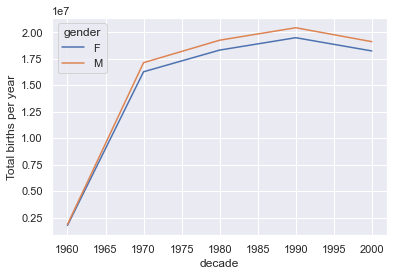

In [17]:
birth_decade = births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')
birth_decade.plot()
plt.ylabel('Total births per year')
plt.show()

In [18]:
# Removing outliers by using sigma clipping operation
import numpy as np

In [19]:
quartiles = np.percentile(births['births'],[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [20]:
mu = quartiles[1]
sig = 0.74 * (quartiles[2]-quartiles[0])

In [22]:
# query method
births = births.query('(births >@mu-5 *@sig) & (births <@mu + 5*@sig)')

In [23]:
births['day'] = births['day'].astype(int)

In [25]:
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month+
                             births.day,format = '%Y%m%d')

In [28]:
births['dayofweek'] = births.index.dayofweek

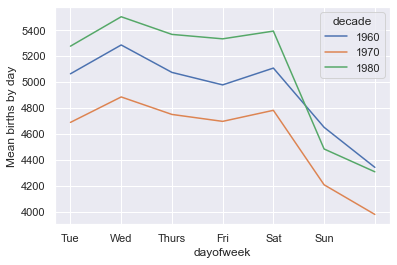

In [30]:
# Now plotting births by weekday for several decades
births.pivot_table('births', index='dayofweek',
                  columns ='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Mean births by day')
plt.show()

In [31]:
births_month = births.pivot_table('births', [births.index.month,births.index.day])

In [32]:
births_month.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [36]:
births_month.index = [pd.datetime(2012,month,day)
                     for (month,day) in births_month.index]

<ipython-input-36-b6364ccd5186>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012,month,day)


In [38]:
births_month.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


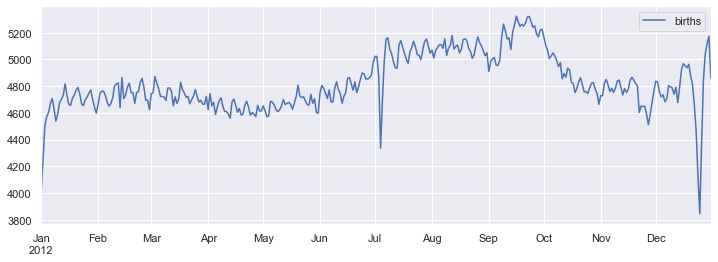

In [39]:
fig,ax = plt.subplots(figsize=(12,4))
births_month.plot(ax=ax)
plt.show()